# <u>Assignment 1 A </u>

#  


In [89]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load the data in Python 

In [90]:
df = pd.read_csv("./ab40c054-5031-4376-b52e-9813e776f65e.csv")

### CLEANING OF THE DATA

In [91]:
#dropping columns having all the NAN values
df = df.dropna(how='all', axis=1)


In [92]:
#defining list of all the union territories
union_territories=['Delhi','Chandigarh','Puducherry','Andaman & Nicobar Islands','Ladakh','Lakshadweep','Silvassa','Daman and Diu']

In [93]:
#cleaning all the columns which are union territories
for i in df.columns:
    if i in union_territories:
        df.drop(i,axis=1,inplace=True)

In [94]:
#filtering only the required rows.
pg=df[df['Items  Description'] =='(% Growth over previous year)']


### Plot a graph for rows " % Growth over previous year" for all the states (not union territories) whose data is available

In [95]:
#defining new column to plot '% growth over previous years'
pg['x']=[1.0,2.0,3.0,4.0,5.0]

In [96]:
#defining a empty dictionaries to store the slope values of the lines
slp={}

In [97]:
#defining list of columns
lis_of_columns=df.columns

### Treatment of missing values

In [98]:
#replacing all the NAN values with the mean value of that column
for i in range(2,len(lis_of_columns)):
    pg.loc[np.isnan(pg[lis_of_columns[i]]), [lis_of_columns[i]]] = pg[lis_of_columns[i]].mean()

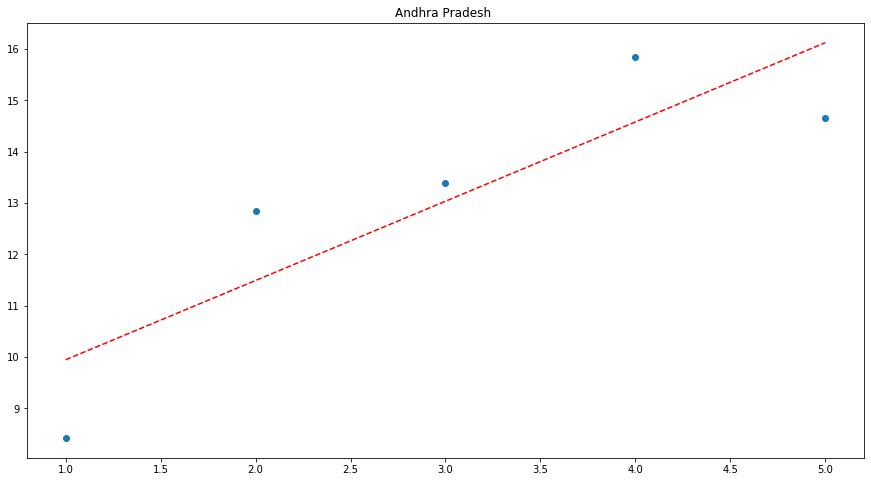

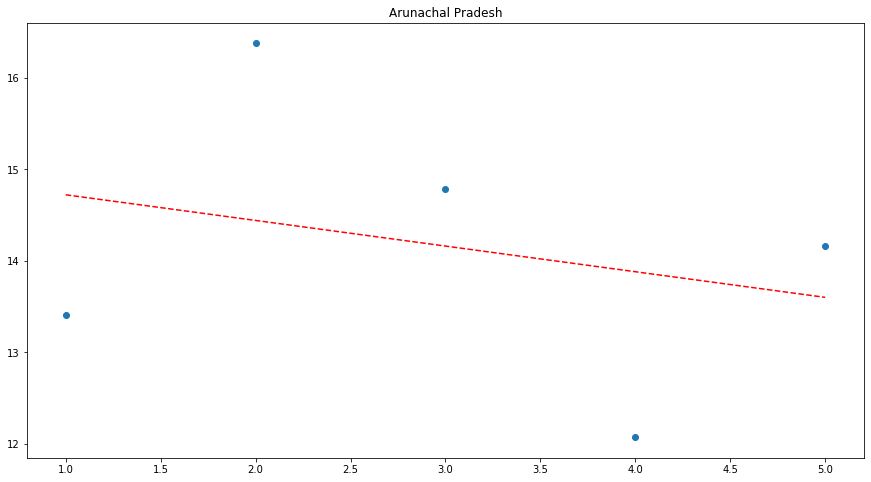

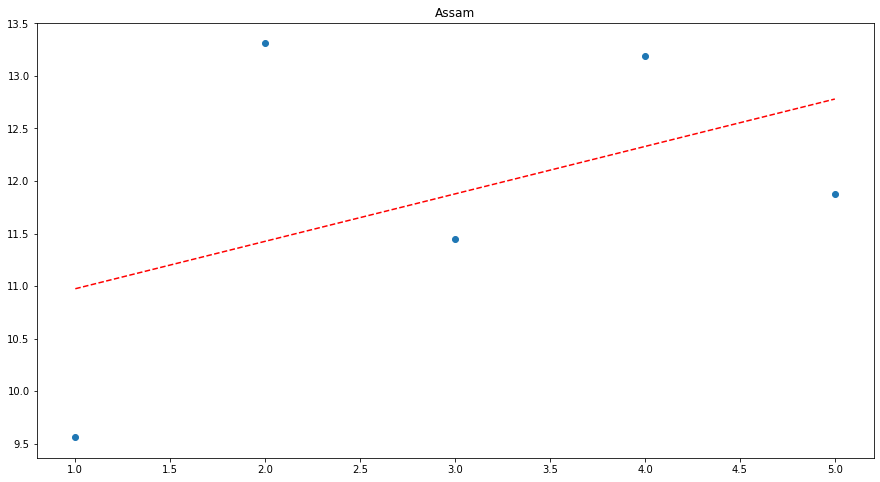

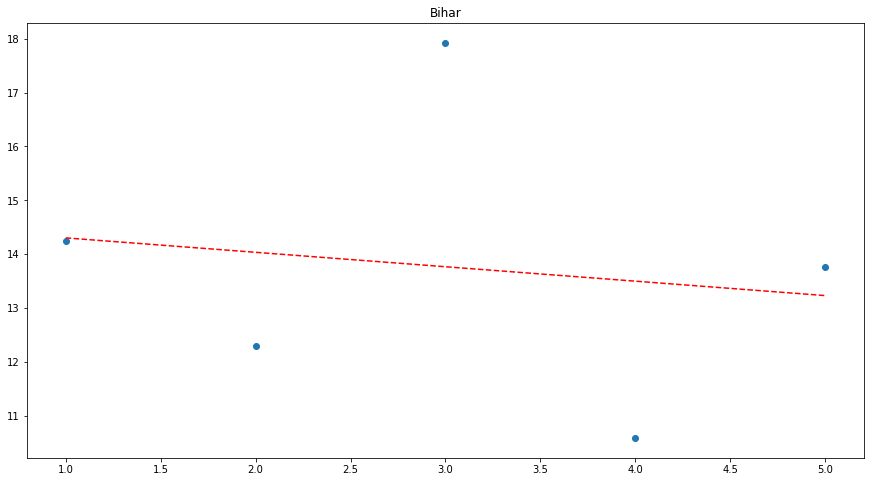

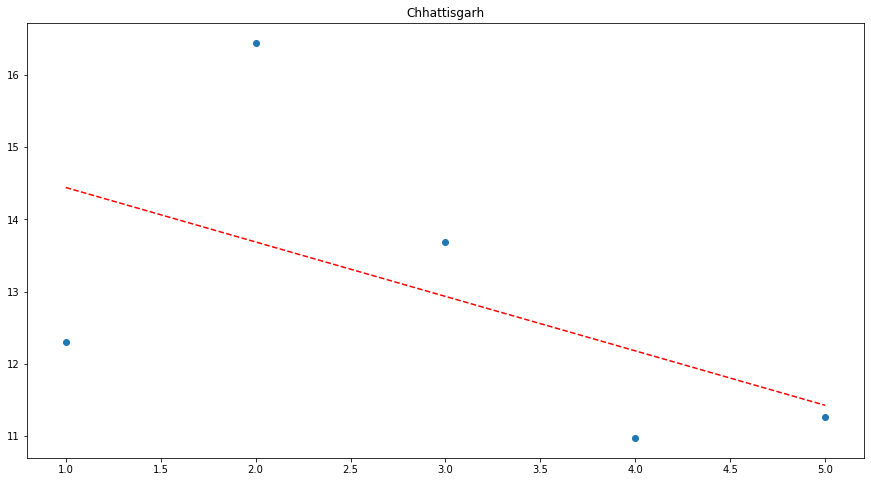

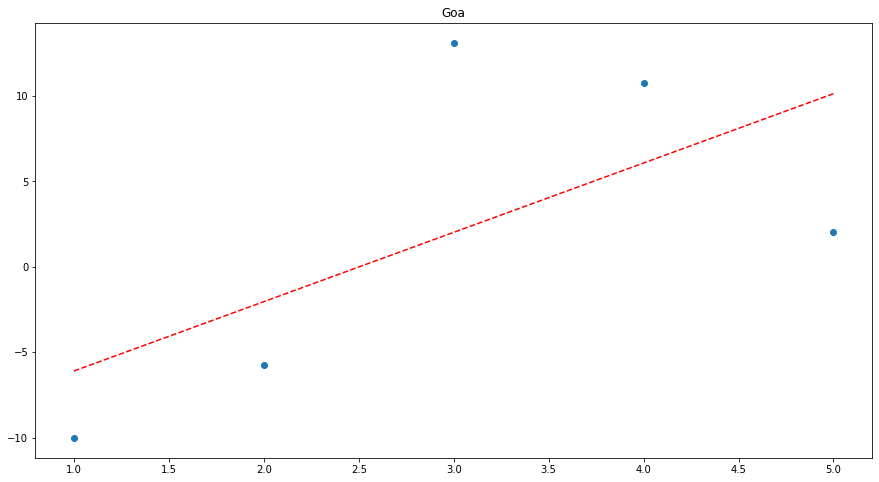

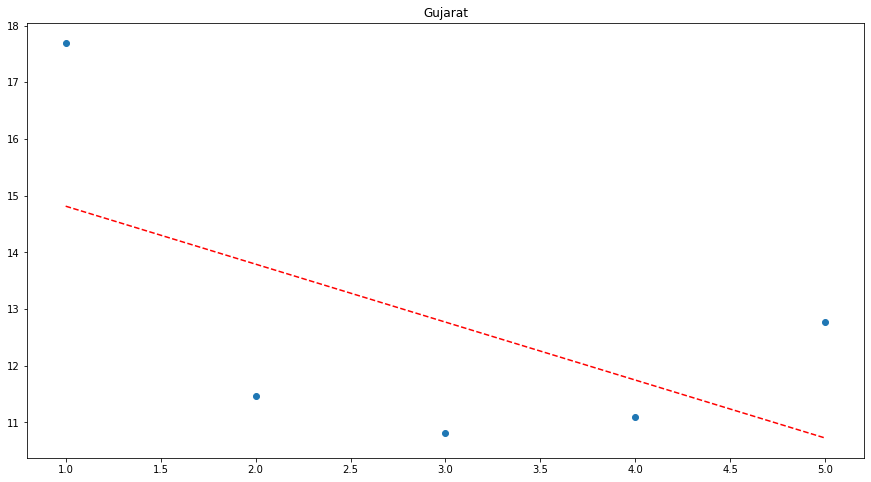

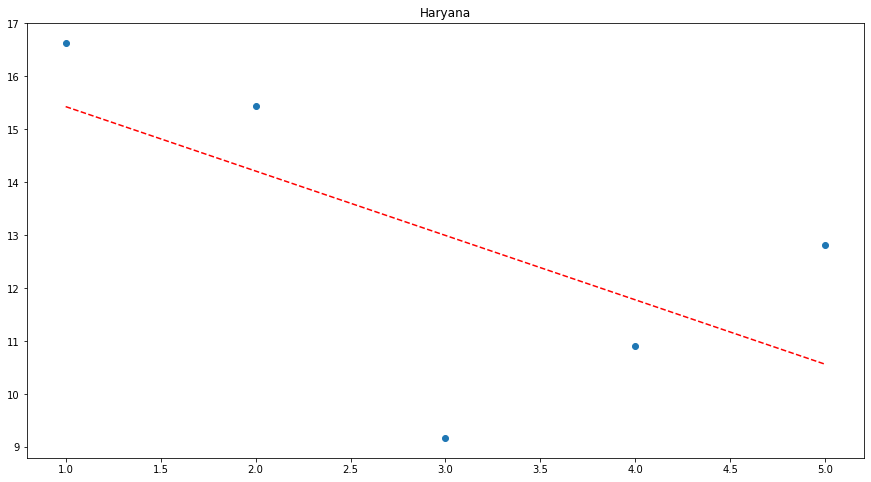

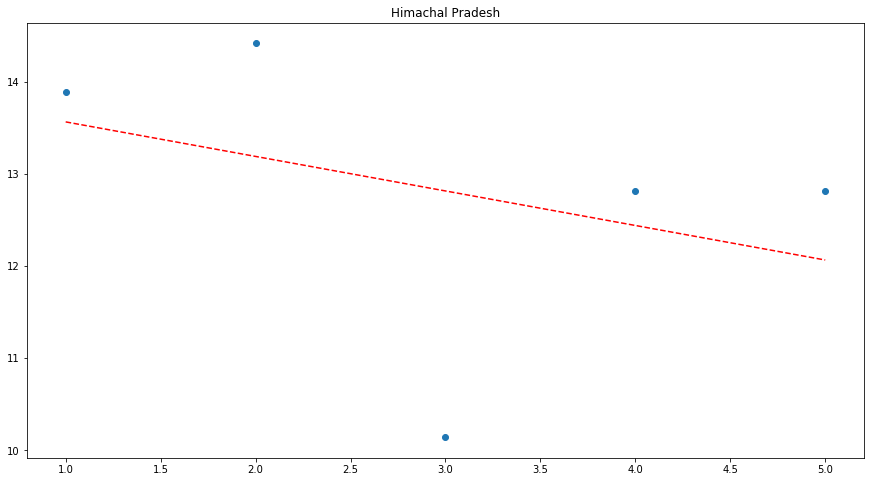

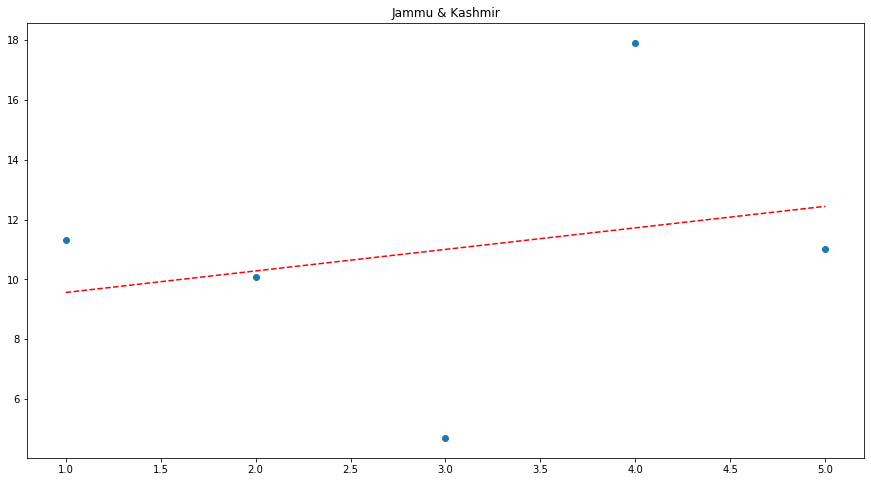

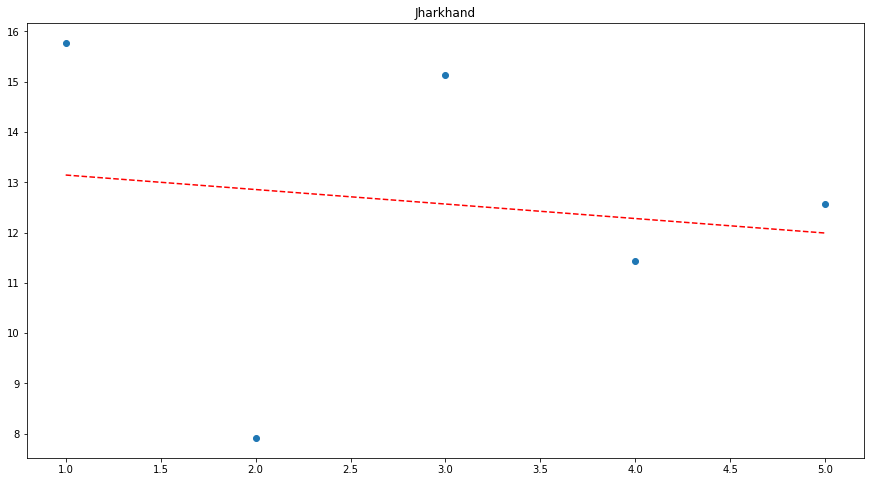

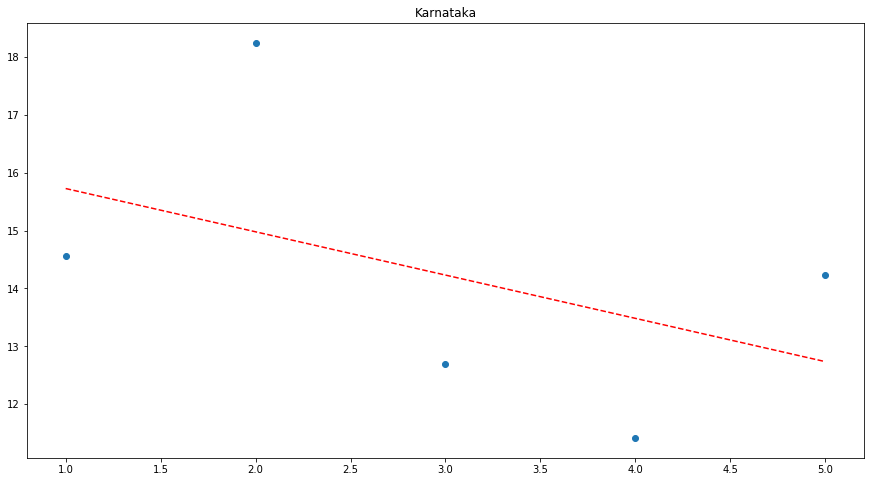

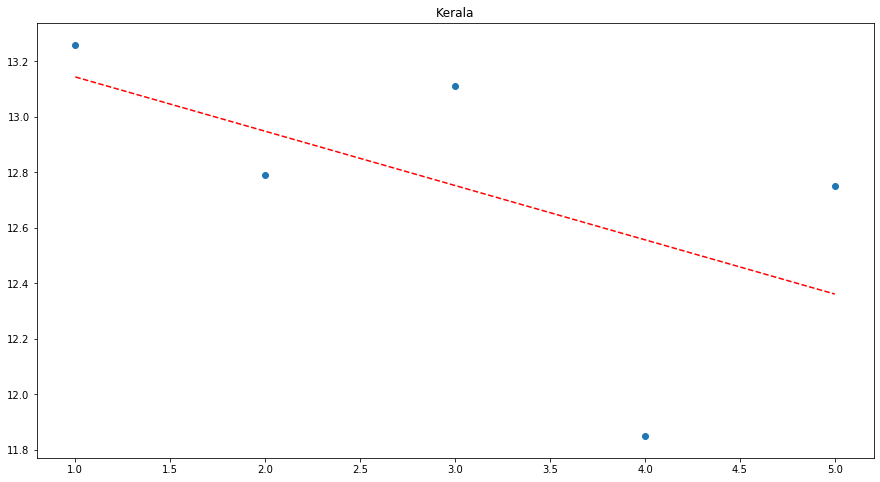

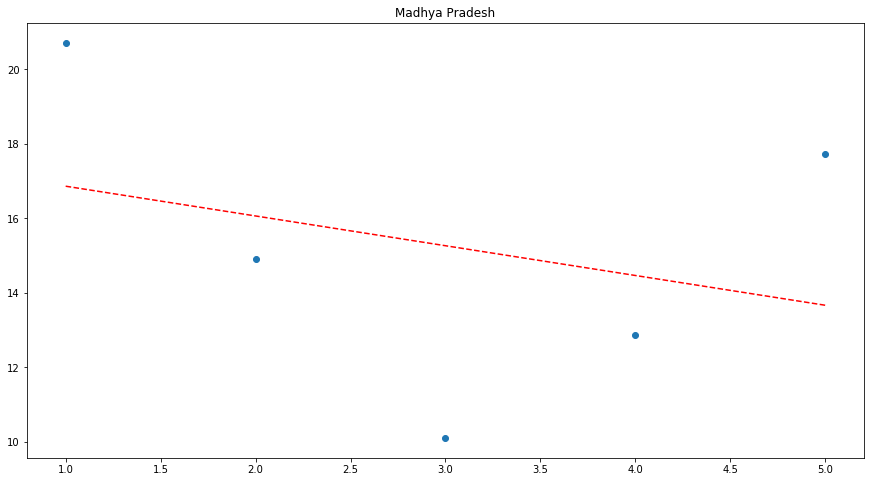

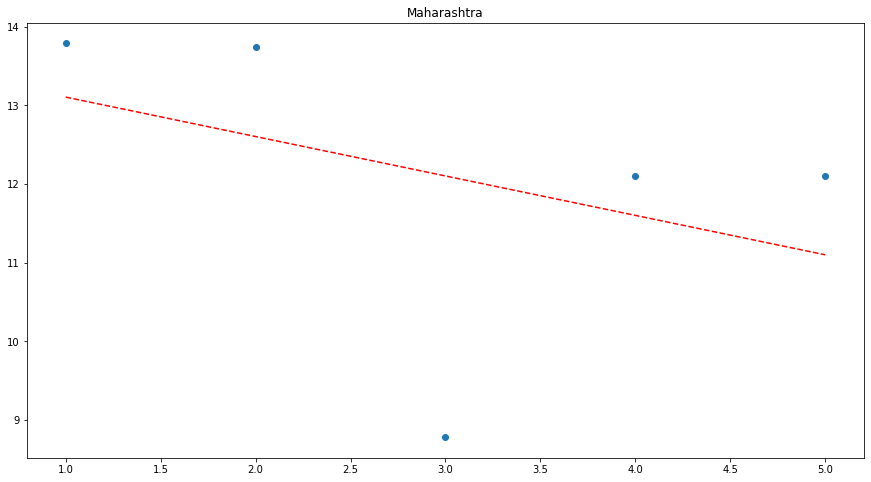

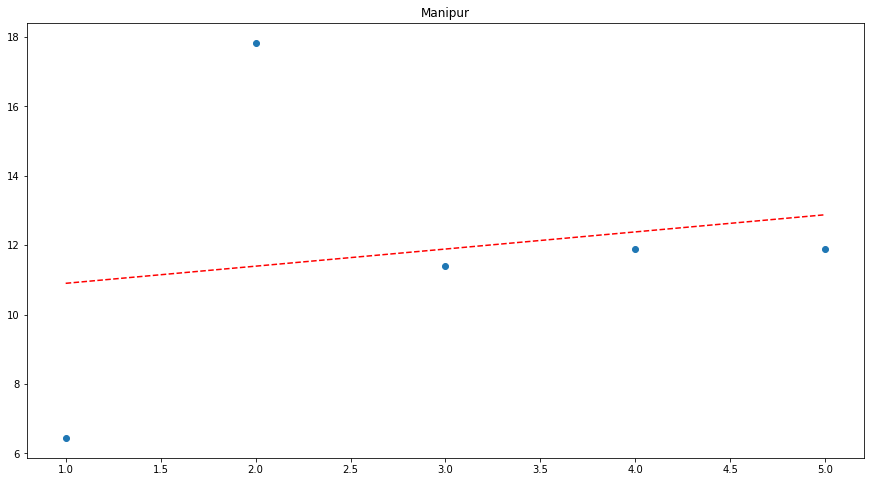

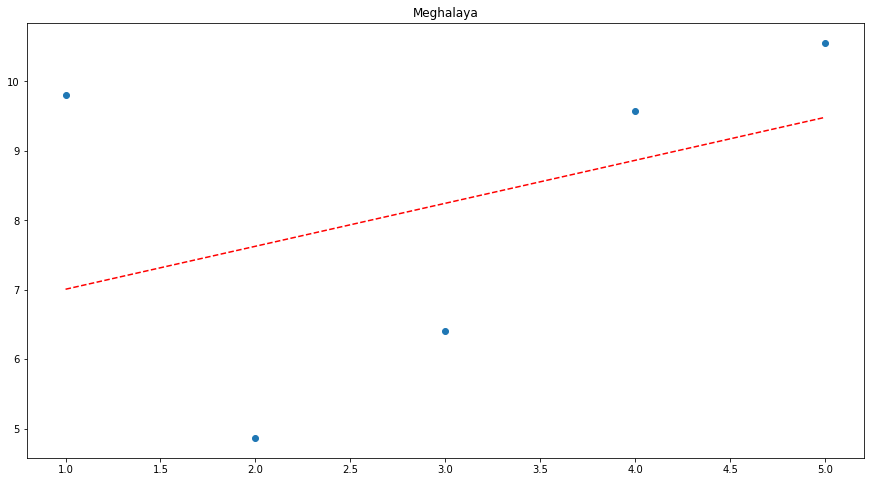

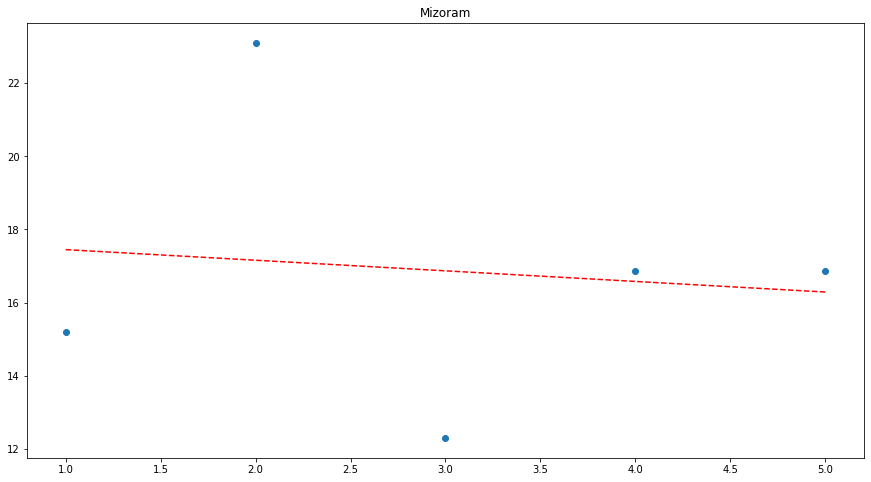

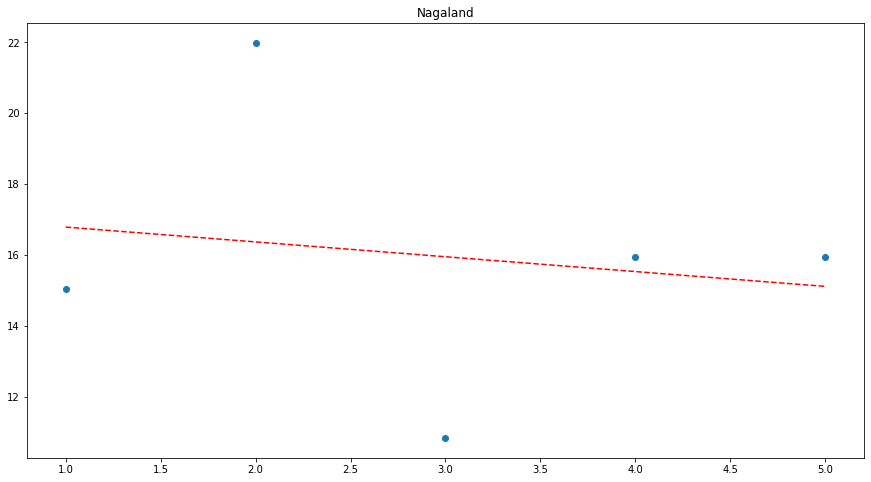

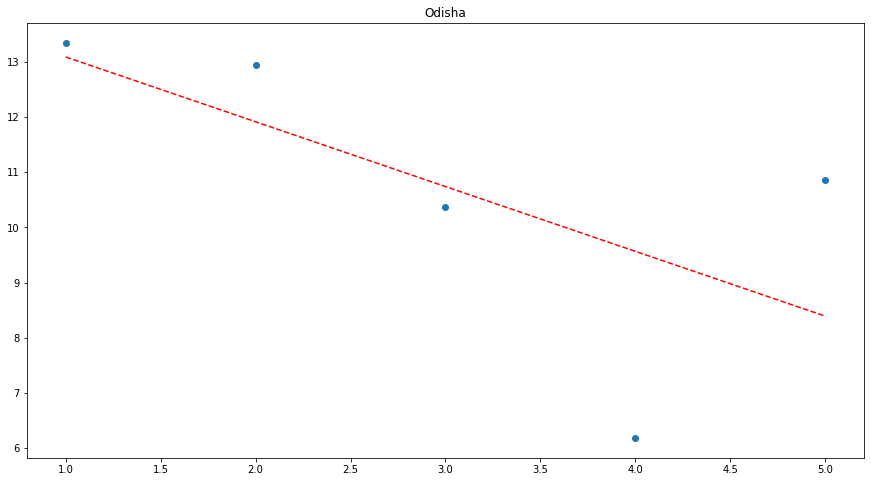

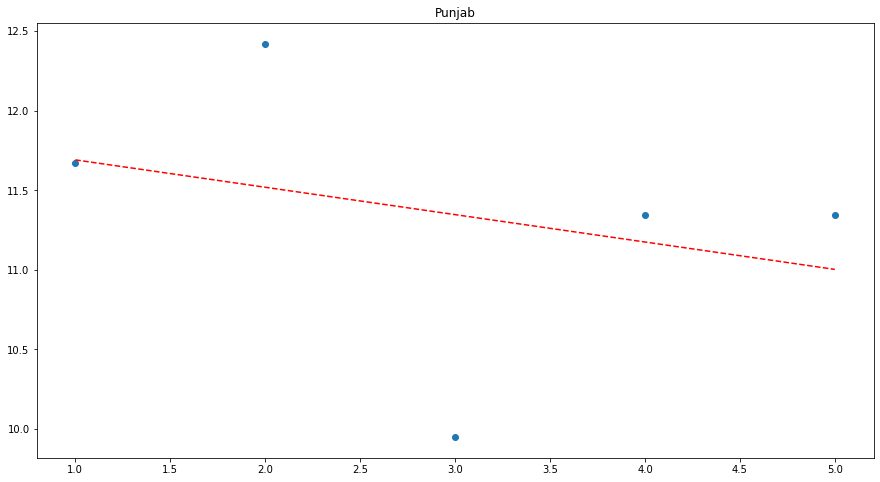

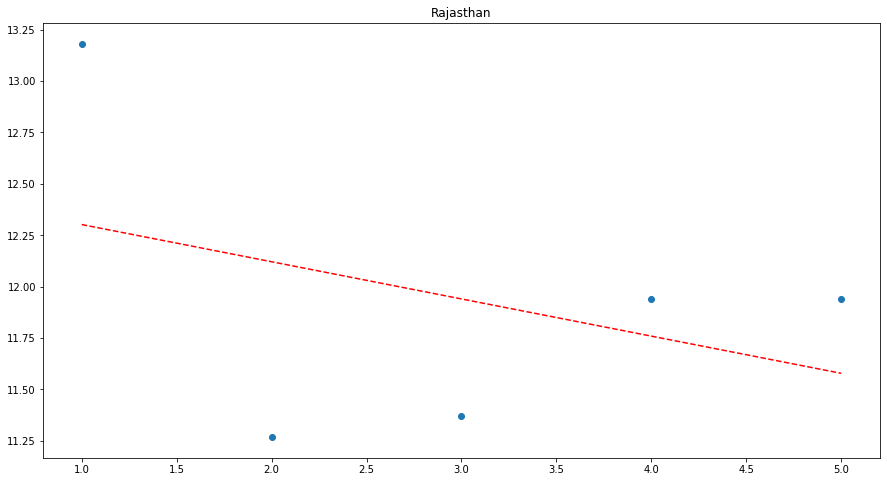

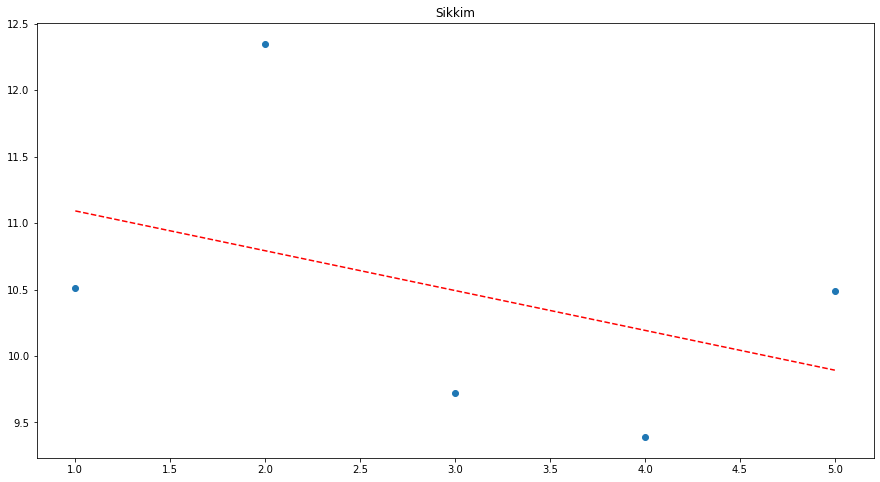

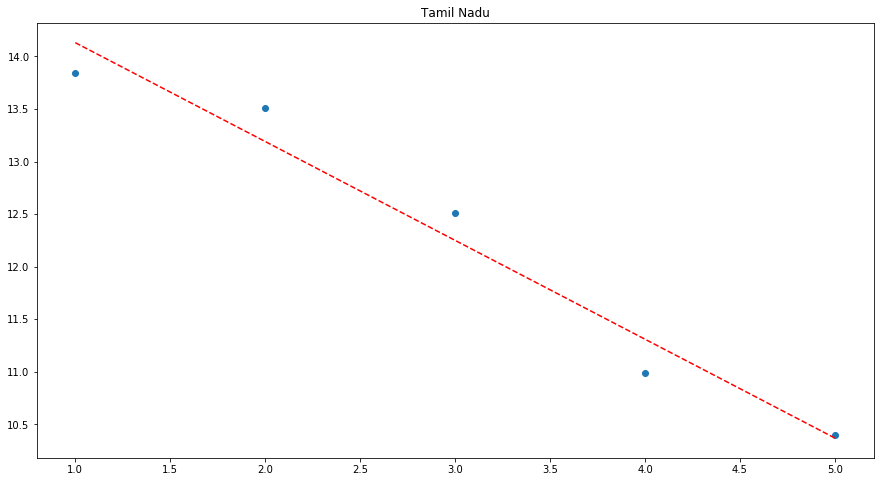

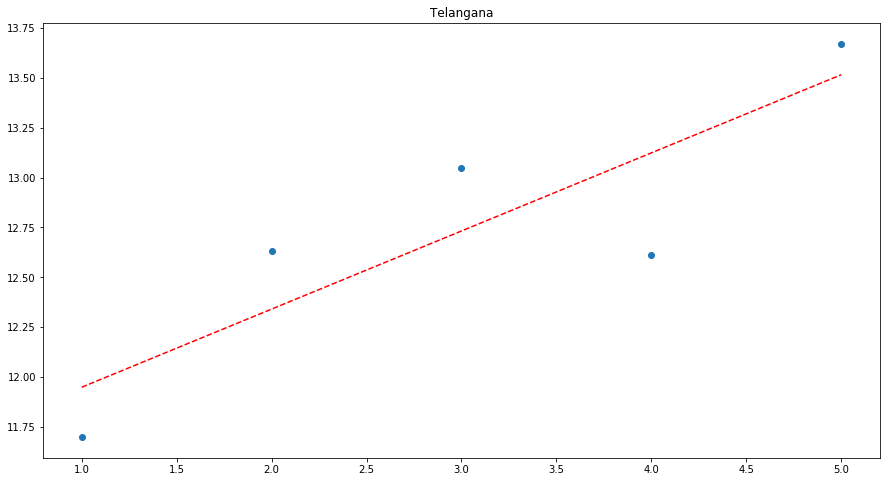

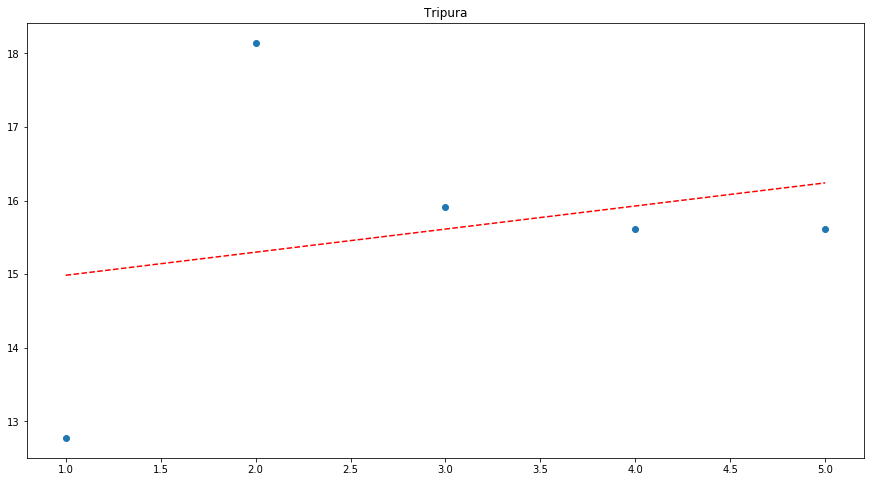

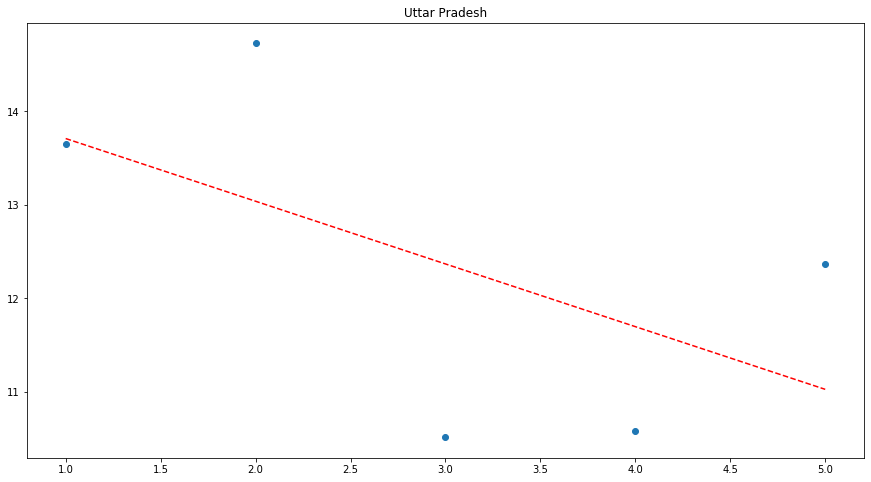

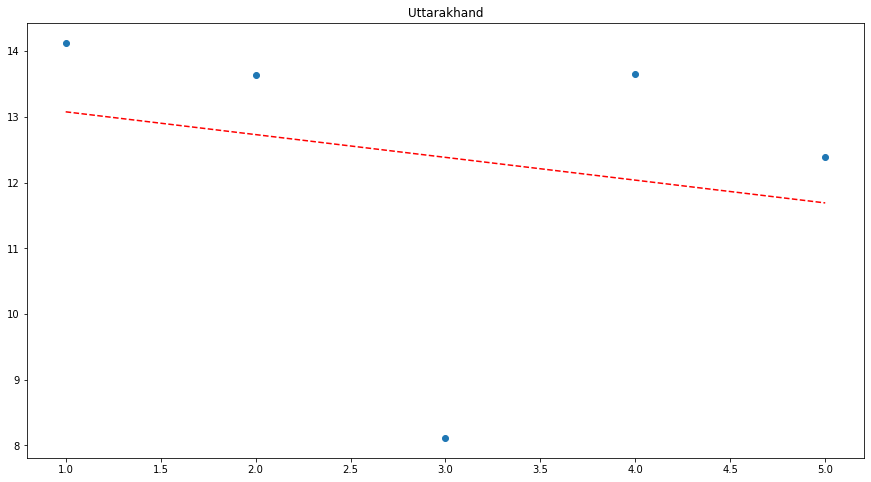

In [99]:
#plotting the scatter plot of every state with respect to column x we defined
for i in range(2,len(lis_of_columns)-1):
    plt.figure() #for every iteration we are defining new figure to make a new plot  
    print(plt.scatter('x',y=lis_of_columns[i],data=pg))
    plt.title(lis_of_columns[i])#giving the state name as capital for each plot
    m,c=np.polyfit(pg['x'],pg[lis_of_columns[i]],1)#we are using this to get the best fit line
    slp[lis_of_columns[i]]=m
    plt.plot(pg['x'], m*pg['x']+c, '--r')#plotting the best fit line


### What is the Nation's growth rate?

-0.7660000000000007

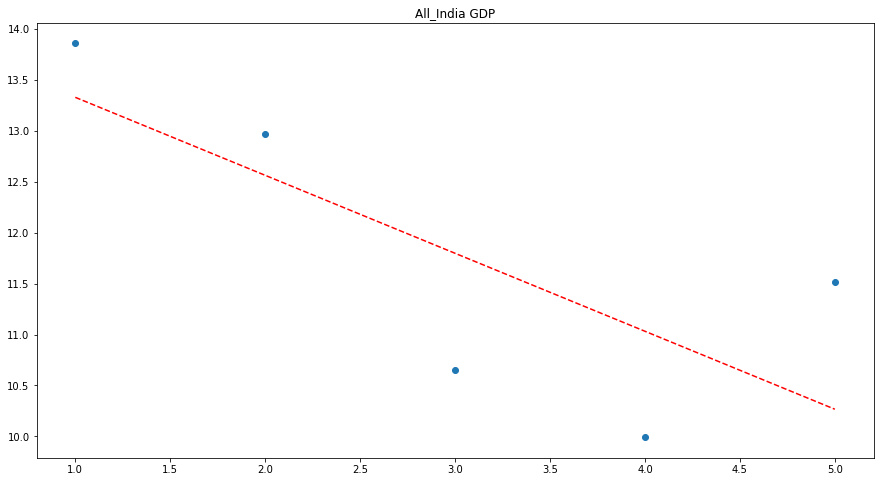

In [100]:
plt.figure() #for every iteration we are defining new figure to make a new plot  
print(plt.scatter('x',y=lis_of_columns[-1],data=pg))
plt.title(lis_of_columns[-1])#giving the state name as capital for each plot
m,c=np.polyfit(pg['x'],pg[lis_of_columns[-1]],1)#we are using this to get the best fit line
slp[lis_of_columns[-1]]=m
plt.plot(pg['x'], m*pg['x']+c, '--r')#plotting the best fit line
m

### Ans: Nation's growth rate:-0.7660000000000011

### What has been the growth rate of your home state, and how does it compare to the national growth rate?

In [101]:
a = sorted(slp.items(), key = lambda k:(k[1]))
a

[('Haryana', -1.2159999999999984),
 ('Odisha', -1.1739999999999997),
 ('Gujarat', -1.022499999999999),
 ('Tamil Nadu', -0.9400000000000004),
 ('Madhya Pradesh', -0.7990000000000013),
 ('All_India GDP', -0.7660000000000007),
 ('Chhattisgarh', -0.754),
 ('Karnataka', -0.7480000000000008),
 ('Uttar Pradesh', -0.6715000000000014),
 ('Maharashtra', -0.5010000000000001),
 ('Nagaland', -0.4180000000000019),
 ('Himachal Pradesh', -0.3749999999999999),
 ('Uttarakhand', -0.34650000000000125),
 ('Sikkim', -0.2995000000000008),
 ('Mizoram', -0.29000000000000115),
 ('Jharkhand', -0.2884999999999996),
 ('Arunachal Pradesh', -0.28049999999999947),
 ('Bihar', -0.26800000000000124),
 ('Kerala', -0.19549999999999979),
 ('Rajasthan', -0.18100000000000022),
 ('Punjab', -0.172000000000001),
 ('Tripura', 0.31399999999999895),
 ('Telangana', 0.3919999999999987),
 ('Assam', 0.4514999999999985),
 ('Manipur', 0.49400000000000055),
 ('Meghalaya', 0.6190000000000004),
 ('Jammu & Kashmir', 0.7204999999999994),
 ('

### ans :growth rate of my home town is -0.671500000000001(up)

### Que:How will you compare the growth rates of any two states?
Ans: WE WILL COMPARE THE GROWTH RATE BASED ON THE SLOPE

In [102]:
gr15=df[(df['Items  Description']=='GSDP - CURRENT PRICES (` in Crore)') &( df['Duration']=='2015-16')]

In [103]:
gr15.drop(columns=['Items  Description'],axis=1,inplace=True)

In [104]:
gr15.drop(columns=['Duration'],axis=1,inplace=True)

In [105]:
gr15=gr15.T

In [106]:
gr15.reset_index(inplace=True)

### Which Plot will you use for this? Why? 

ANS: WE will use a bar plot as it shows comparisons among discrete categories and states are the discrete categories

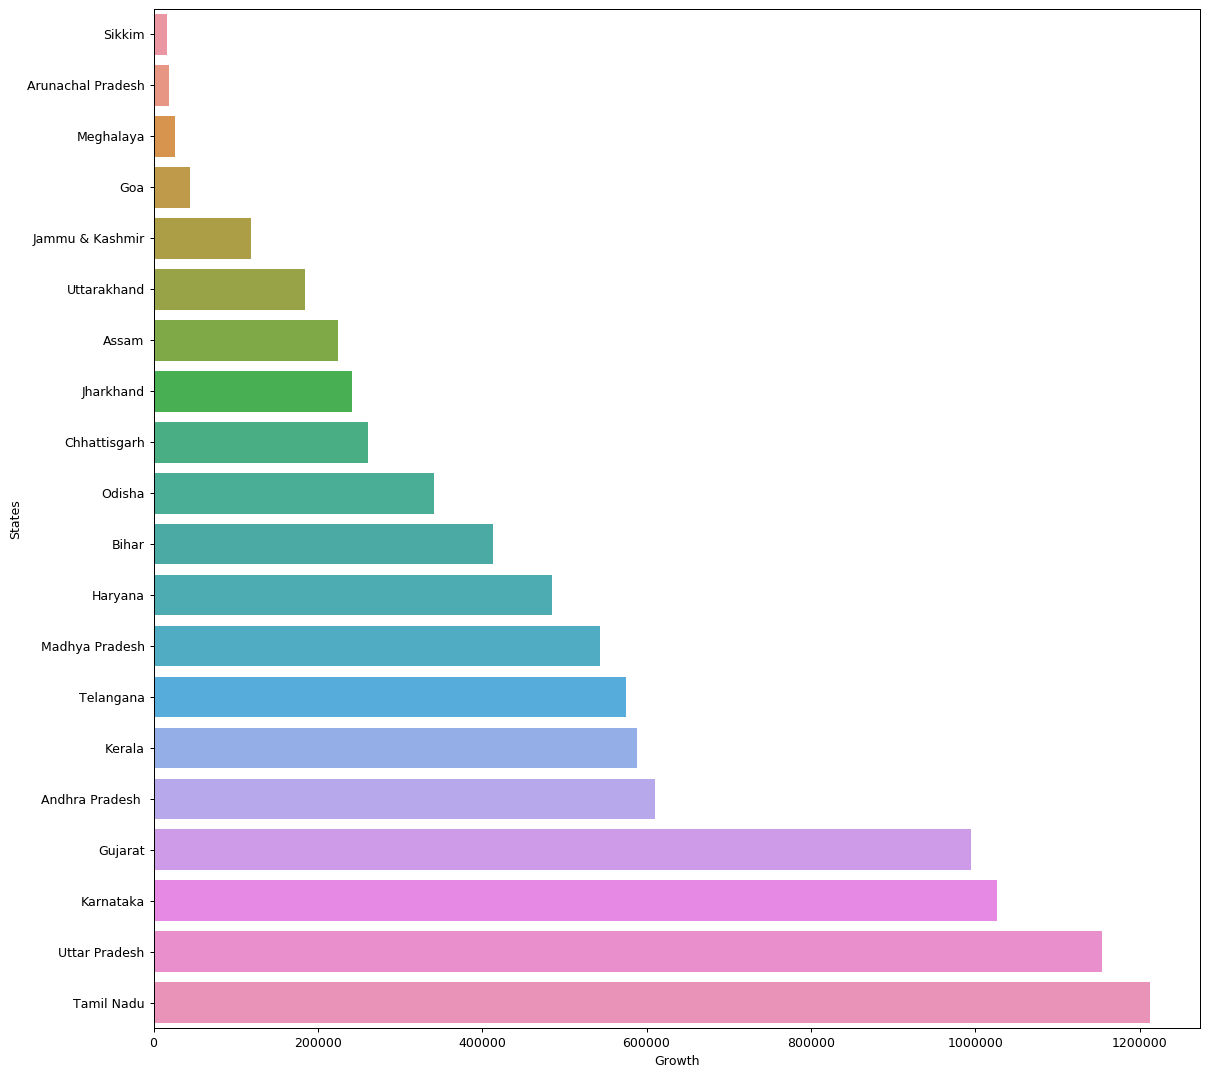

In [107]:
#plotting the graph
gr15.rename(columns={'index': "States", 4: "Growth"},inplace=True)
gr15=gr15[gr15['States']!='All_India GDP']
gr15.dropna(axis=0,inplace=True)
gr15.sort_values(by=['Growth'],inplace=True)
plt.figure(figsize=(15, 15), dpi=90)
sns.barplot(x='Growth', y='States', data=gr15)


## Identify the top 5 and the bottom 5 states based on total GDP.
Ans 
top 5: ['Tamil_Nadu';'U.P.';'Karnataka';'Gujrat';'Arunachal_pradesh']

bottom5: ['sikkim','arunachal_pradesh','meghalaya','Goa','Jammu and Kashmir']



## What insights can you draw from this graph? What states are performing poorly? 
['sikkim','arunachal_pradesh','meghalaya']

#  ----------------------------------------------------------------------------------------------------------


# <u> PART 1B</u>






#  

In [108]:
#importing necessary library
import glob

In [109]:
#defining path for the file
path=r'C:\Users\shian\Desktop\upgrad\gdp\data 2'

In [110]:
#accessing file names in all file with help of glob library
all_files=glob.glob(path+'/*.csv')

In [111]:
#for cleaning of the union terr
union_terr=['Puducherry','Chandigarh','Delhi']

In [112]:
li=[]

### Filter out the union territories (Delhi, Chandigarh, Andaman and Nicobar Islands, etc.) 

In [113]:
#cleaning of the data neede and adding state name in the file
for file_name in all_files:
    if(file_name.split('\\')[-1].split('-')[1]) not in union_terr:
        df2=pd.read_csv(file_name,encoding='ISO-8859-1')
        df2=df2[['Item','2014-15']]
        df2=df2.set_index('Item')
        df2=df2.T
        df2.loc[:,'states']=file_name.split('\\')[-1].split('-')[1]
        li.append(df2)

In [114]:
df2=pd.concat(li,axis=0,ignore_index=True)

In [115]:
#df4 will be used in part2
df4=df2.copy()

In [116]:
#setting index as states
df2=df2.set_index('states')

In [117]:
df2['states']=df2.index

In [118]:
#sorting the dataframe on the basis of per_capita_gsdp
a=df2.sort_values(by=['Per Capita GSDP (Rs.)'],inplace=True)

### Plot the GDP per capita for all the states.

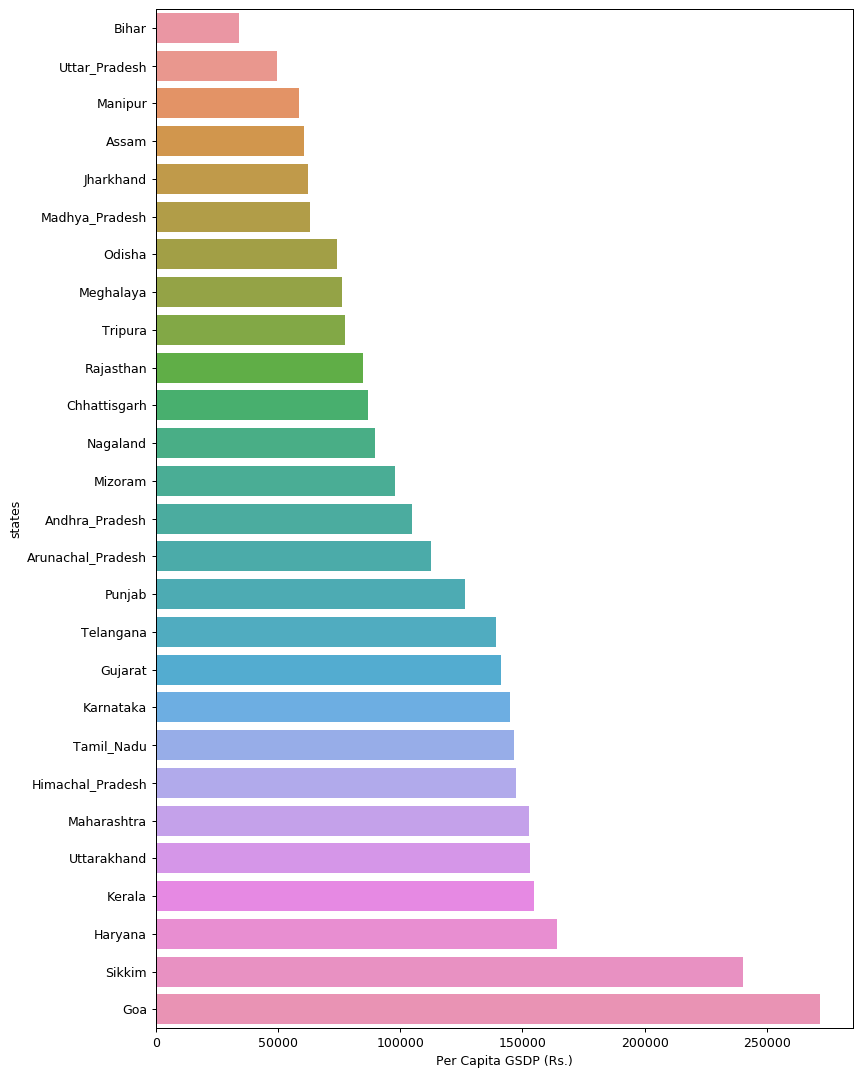

In [119]:
#plotting the bar chart as each state is a distinct category
plt.figure(figsize=(10, 15), dpi=90)
sns.barplot(x='Per Capita GSDP (Rs.)', y='states', data=df2)

##   Ques: Identify the top 5 and the bottom 5 states based on the GDP per capita.

### Ans:  

top_5 = ['GOA','SIKKIM','HARYANA','KERALA','UTTARAKHAND'];

BOTTOM_5 = ['BIHAR','UTTAR_PRADESH','MANIPUR','ASSAM','JHARKHAND']


##  Ques:  Find the ratio of the highest per capita GDP to the lowest per capita GDP.

In [120]:
#ratio of lowest to the highest state
ratio=df2.loc['Bihar','Per Capita GSDP (Rs.)']/df2.loc['Goa','Per Capita GSDP (Rs.)']

# Ans

In [121]:
ratio

0.12492595467874448

## Plot the percentage contribution of the primary, secondary and tertiary sectors

In [122]:
df2.loc[:,'primary_per']=round(df2['Primary']/df2['Gross State Domestic Product']*100,1)

In [123]:
df2.loc[:,'secondary_per']=round(df2['Secondary']/df2['Gross State Domestic Product']*100,1)

In [124]:
df2.loc[:,'tertiary_per']=round(df2['Tertiary']/df2['Gross State Domestic Product']*100,1)

## Which plot will you use here? Why?

## Ans: WE USE STACKED BAR CHART BECAUSE EACH STATE HAS DIFFERENT SOURCE OF GSDP THAT IS ['PRIMARY','SECONDARY','TERTIARY']

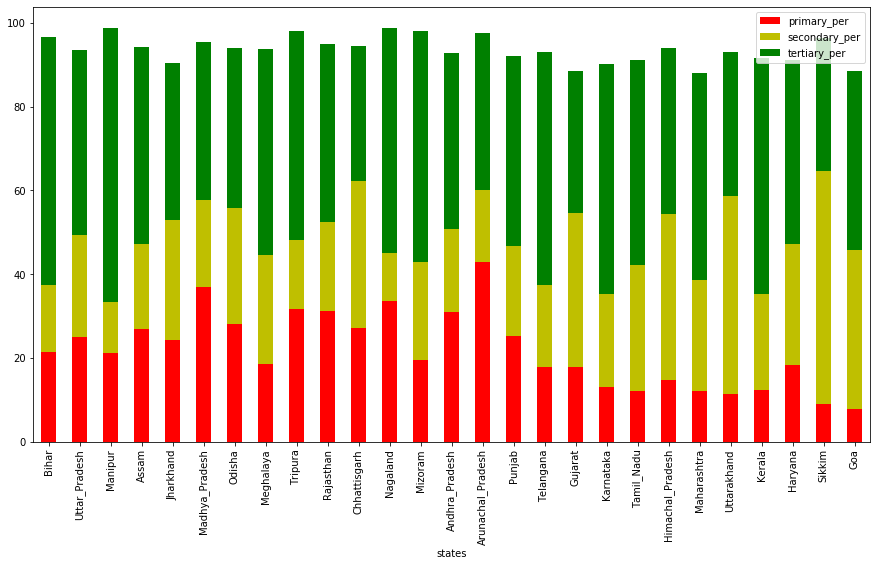

In [125]:
#plotting the bar graph
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

raw_data=df2[:][['primary_per','secondary_per','tertiary_per']]
raw_data.plot(kind='bar', stacked=True,color=['r','y','g'])
plt.show()

## Ques:Why is (Primary + Secondary + Tertiary) not equal to total GDP

### ANS:Primary+secondary+tertiary is not equal to the total gdp beacuse we give tax to the government and we receive subsidy which also contributes to the total GDP. TOTAL_GDP = primary+secondary+tertiary+tax-subsidy

## Ques:Find correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP.

In [126]:
#using rank function to calculate the percentile
df2["Percentile_Rank"] = df2["Gross State Domestic Product"].rank(ascending=False) 

# Ans:

In [127]:
#calculating correlation
df2['Percentile_Rank'].corr(df2['primary_per'])

0.14432705526840847

## Ques:Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.

In [128]:
#calculating the quantile value
qua=df2['Per Capita GSDP (Rs.)'].quantile([0.20,0.5,0.85,1])

In [129]:
qua

0.20     65187.0
0.50    104977.0
0.85    153246.2
1.00    271793.0
Name: Per Capita GSDP (Rs.), dtype: float64

In [130]:
#defining the category
df2['category']=''
for i in df2.index:
    if df2['Per Capita GSDP (Rs.)'][i]>=qua[0.85]:
        df2['category'][i]='C1'
    elif df2['Per Capita GSDP (Rs.)'][i]>=qua[0.50]:
        df2['category'][i]='C2'
    elif df2['Per Capita GSDP (Rs.)'][i]>=qua[0.20]:
        df2['category'][i]='C3'
    else:
        df2['category'][i]='C4'
    

In [131]:
#creating pivot table
raw_data2=df2.pivot_table(values = ['Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product'], index = 'category', aggfunc = 'sum')

In [132]:
raw_data2


,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Gross State Domestic Product,Manufacturing,Mining and quarrying,Other services,Public administration,"Real estate, ownership of dwelling & professional services","Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting"
category,,,,,,,,,,,,
C1,14391809.0,11264451.0,2000998.0,3936489.0,101930677.0,13758793.0,588961.0,8059922.0,3571292.0,14740245.0,13995159.0,6818560.0
C2,90028438.0,45318451.0,14975107.0,38197505.0,639027294.0,113868796.0,11857646.0,40469046.0,20768712.0,96526855.0,65472262.0,38826792.0
C3,27407472.0,11043032.0,3453045.0,3865363.0,125319545.0,17366065.0,9351471.0,8600028.0,5726276.0,11818709.0,13011909.0,7154500.0
C4,56735044.0,22775948.0,4310264.0,7684498.0,233252066.0,24987032.0,6096419.0,15859015.0,13486630.0,24177534.0,27484595.0,16191800.0


## Ques:Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of each category.

In [133]:
#assigning column to list
lis=raw_data2.columns

In [134]:
#calculating the percentage contribution
for i in  lis:
    raw_data2[i+'_per']=''
    for j in raw_data2.index:
        raw_data2[i+'_per'][j]=round(((raw_data2[i][j]/raw_data2['Gross State Domestic Product'][j])*100),1)


In [135]:
#filtering unnecessary data
raw_data2.drop(['Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product','Gross State Domestic Product_per'],axis=1,inplace=True)

In [136]:
raw_data2=raw_data2.T


In [137]:
raw_data2

category,C1,C2,C3,C4
"Agriculture, forestry and fishing_per",14.1,14.1,21.9,24.3
Construction_per,11.1,7.1,8.8,9.8
"Electricity, gas, water supply & other utility services_per",2,2.3,2.8,1.8
Financial services_per,3.9,6,3.1,3.3
Manufacturing_per,13.5,17.8,13.9,10.7
Mining and quarrying_per,0.6,1.9,7.5,2.6
Other services_per,7.9,6.3,6.9,6.8
Public administration_per,3.5,3.3,4.6,5.8
"Real estate, ownership of dwelling & professional services_per",14.5,15.1,9.4,10.4
"Trade, repair, hotels and restaurants_per",13.7,10.2,10.4,11.8


In [138]:
#sorting the values as per the gdp
c1df=raw_data2[['C1']]
c1df.reset_index(inplace=True)
c1df.rename(columns={"index": "Sector", "C1": "% of the GSDP"},inplace=True)
c1df.sort_values(by=['% of the GSDP'],inplace=True,ascending=False)

c1df

category,Sector,% of the GSDP
8,"Real estate, ownership of dwelling & professio...",14.5
0,"Agriculture, forestry and fishing_per",14.1
9,"Trade, repair, hotels and restaurants_per",13.7
4,Manufacturing_per,13.5
1,Construction_per,11.1
6,Other services_per,7.9
10,"Transport, storage, communication & services r...",6.7
3,Financial services_per,3.9
7,Public administration_per,3.5
2,"Electricity, gas, water supply & other utility...",2


In [139]:
#calculating if the gdp contributio is 79% then append that sector to the list
sum=0.0
listc1=[]
for i in c1df.index:
    if sum>=79.0:
        break
    else:
        sum=sum+c1df['% of the GSDP'][i]
        listc1.append(c1df['Sector'][i])

## Ans: Top sub-sectors that contributes almost 80 % of the GSDP for Each category

In [140]:
listc1

['Real estate, ownership of dwelling & professional services_per',
 'Agriculture, forestry and fishing_per',
 'Trade, repair, hotels and restaurants_per',
 'Manufacturing_per',
 'Construction_per',
 'Other services_per',
 'Transport, storage, communication & services related to broadcasting_per']

In [141]:
#sorting the values and setting index
c2df=raw_data2[['C2']]
c2df.reset_index(inplace=True)
c2df.rename(columns={"index": "Sector", "C2": "% of the GSDP"},inplace=True)
c2df.sort_values(by=['% of the GSDP'],inplace=True,ascending=False)


In [142]:
#filtering data for %gsdp =79%
sum=0.0
listc2=[]
for i in c2df.index:
    if sum>=79.0:
        break
    else:
        sum=sum+c2df['% of the GSDP'][i]
        listc2.append(c2df['Sector'][i])

In [143]:
#sorting the values and setting index
c3df=raw_data2[['C3']]
c3df.reset_index(inplace=True)
c3df.rename(columns={"index": "Sector", "C3": "% of the GSDP"},inplace=True)
c3df.sort_values(by=['% of the GSDP'],inplace=True,ascending=False)

In [144]:
#filtering data for %gsdp =79%
sum=0.0
listc3=[]
for i in c3df.index:
    if sum>=79.0:
        break
    else:
        sum=sum+c3df['% of the GSDP'][i]
        listc3.append(c3df['Sector'][i])

In [145]:
listc3

['Agriculture, forestry and fishing_per',
 'Manufacturing_per',
 'Trade, repair, hotels and restaurants_per',
 'Real estate, ownership of dwelling & professional services_per',
 'Construction_per',
 'Mining and quarrying_per',
 'Other services_per',
 'Transport, storage, communication & services related to broadcasting_per']

In [146]:
#sorting the values and setting index
c4df=raw_data2[['C4']]
c4df.reset_index(inplace=True)
c4df.rename(columns={"index": "Sector", "C4": "% of the GSDP"},inplace=True)
c4df.sort_values(by=['% of the GSDP'],inplace=True,ascending=False)

In [147]:
#filtering data for %gsdp =79%
sum=0.0
listc4=[]
for i in c4df.index:
    if sum>=79.0:
        break
    else:
        sum=sum+c4df['% of the GSDP'][i]
        listc4.append(c4df['Sector'][i])

In [148]:
listc4

['Agriculture, forestry and fishing_per',
 'Trade, repair, hotels and restaurants_per',
 'Manufacturing_per',
 'Real estate, ownership of dwelling & professional services_per',
 'Construction_per',
 'Transport, storage, communication & services related to broadcasting_per',
 'Other services_per']

## How does the GDP distribution of the top states (C1) differ from the others?

## Ans : In c1 we can see that gdp contribution is mainly in REAL_STATES while for others it is in 'manufacturing or agriculture'

Text(0.5, 1.0, 'C1')

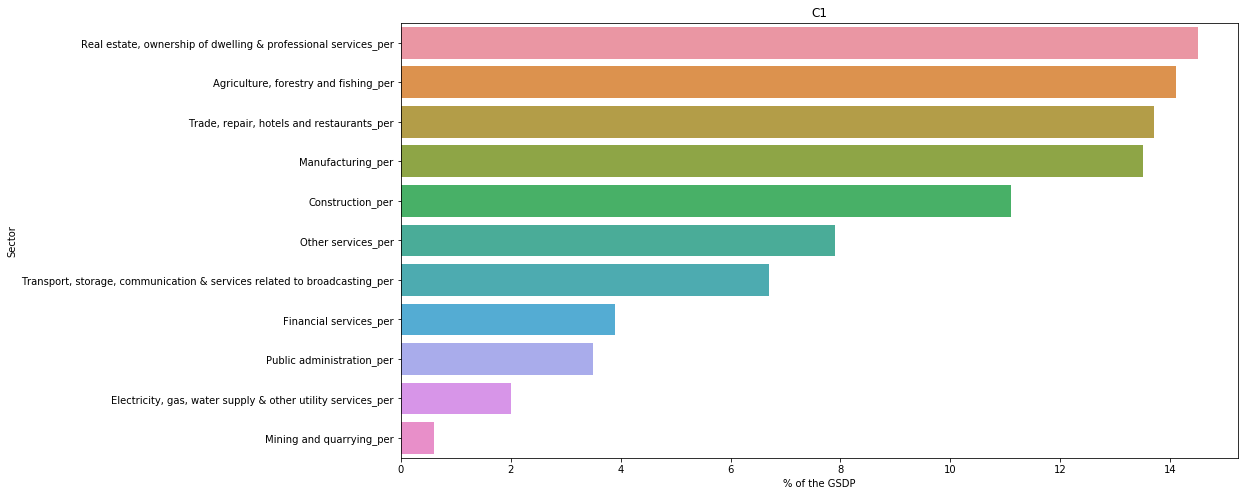

In [149]:
#plot the graph for c1 sector v/s %gsdp
sns.barplot(y='Sector', x='% of the GSDP', data=c1df)
plt.title('C1')

Text(0.5, 1.0, 'C2')

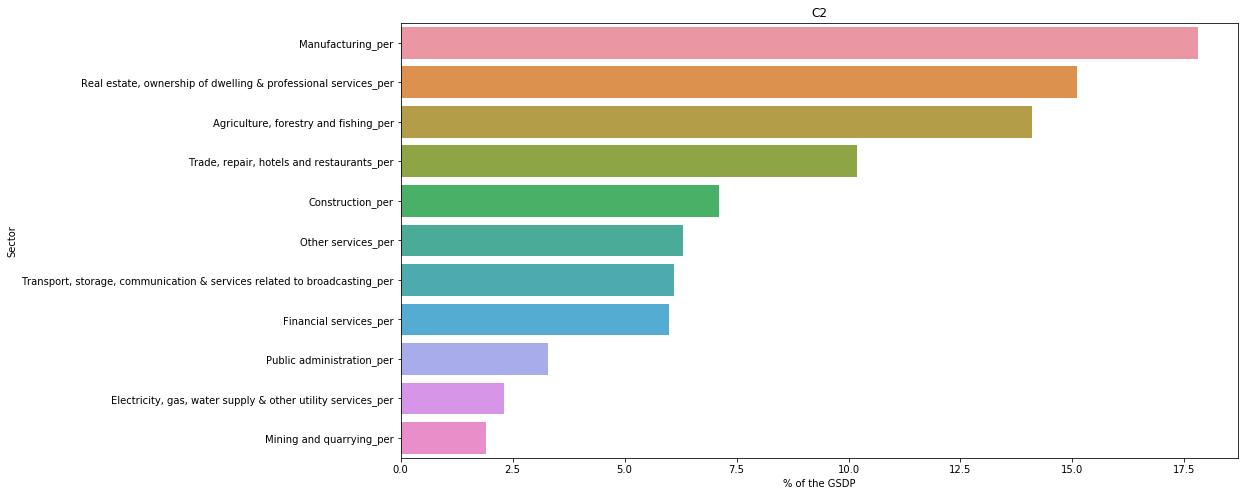

In [150]:
#plot the graph for c2 sector v/s %gsdp
sns.barplot(y='Sector', x='% of the GSDP', data=c2df)
plt.title('C2')

Text(0.5, 1.0, 'C3')

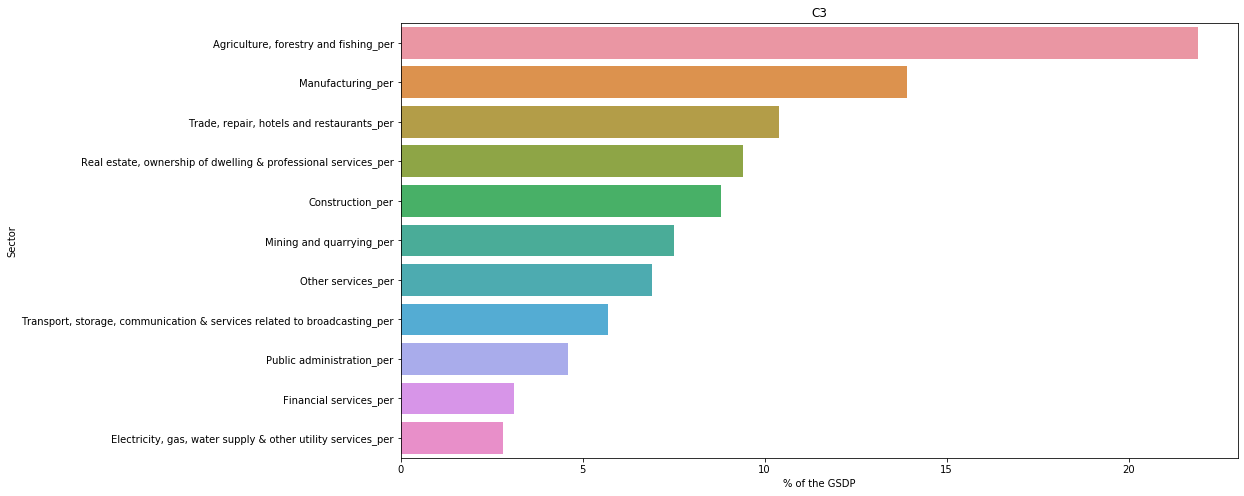

In [151]:
#plot the graph for c3 sector v/s %gsdp
sns.barplot(y='Sector', x='% of the GSDP', data=c3df)
plt.title('C3')

Text(0.5, 1.0, 'C4')

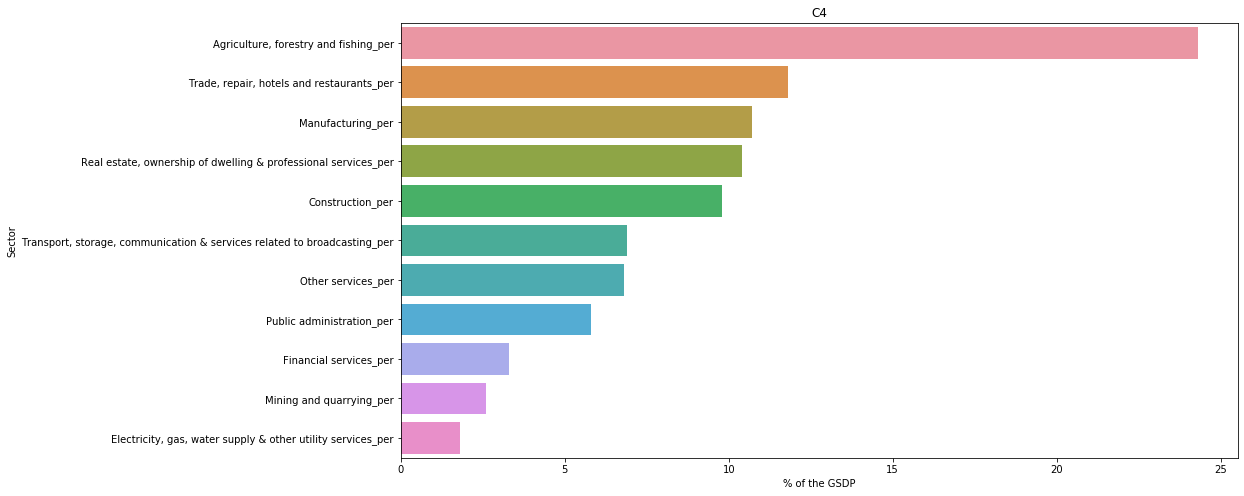

In [152]:
#plot the graph for c4 sector v/s %gsdp
sns.barplot(y='Sector', x='% of the GSDP', data=c4df)
plt.title('C4')

## Additional information(not asked in problem): Plotting the contribution of the sub-sectors as a percentage of the GSDP of each category.  

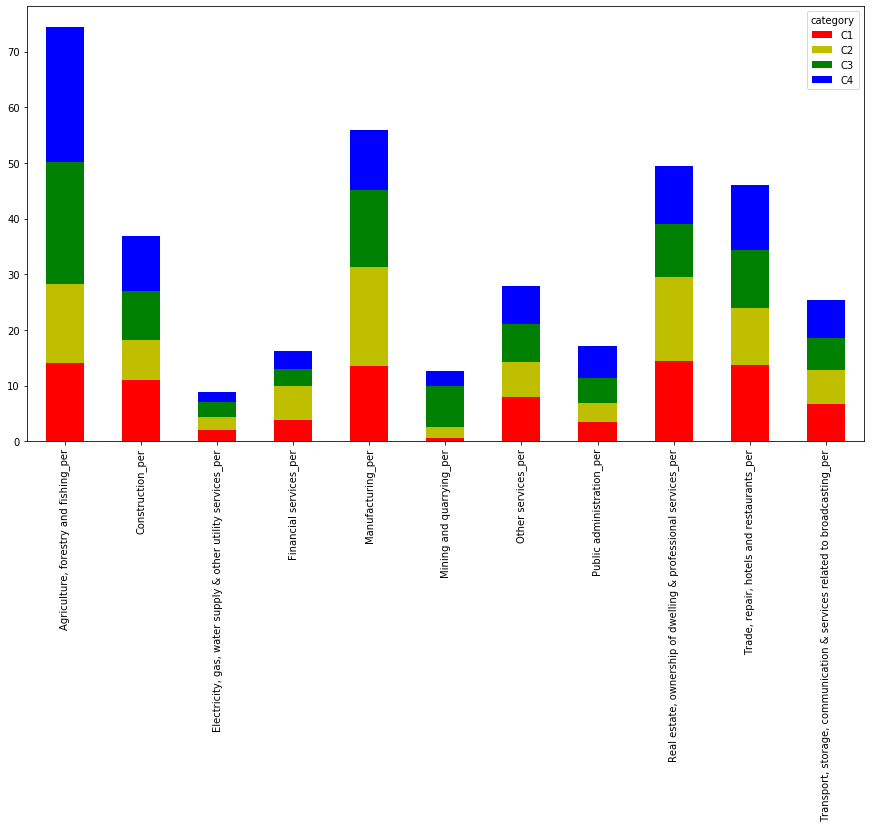

In [153]:
#ADDitional information beside given in the problem
raw_data2.plot(kind='bar', stacked=True,color=['r','y','g','b'])

## Which sub-sectors seem to be correlated with high GDP?

## Ans: From our analysis above, we can see that agriculture is having highest GDP

## Which sub-sectors do the various categories need to focus on? 

## Ans : We need to fucus on MINING AND QUARRYING

# -------------------------------------------------------------------------------------------------------------

# <u>Part 2</u>

#  


In [154]:
#reading the dataframe
df3=pd.read_csv("./rs_session243_au570_1.1.csv")

In [155]:
#filter data based on 2014-15
df3=df3[['Level of Education - State','Primary - 2014-2015.1','Upper Primary - 2014-2015','Secondary - 2014-2015']]

In [156]:
#renmae the columns
df3.rename(columns={'Level of Education - State':'states','Primary - 2014-2015.1':'Primary_Dropout','Upper Primary - 2014-2015':'Upper Primary_Dropout','Secondary - 2014-2015':'Secondary_Dropout'},inplace=True)

In [157]:
#cleaning of dta 
for i in df3.index:
    p=df3['states'][i]
    df3['states'][i]=('_').join(p.split(' '))

In [158]:
#put columns in list to iterate
li2=df3.columns


In [159]:
#cleaning of dta replace nan with median
for i in range(1,len(li2)):
    df3.loc[np.isnan(df3[li2[i]]), [li2[i]]] = df3[li2[i]].median()

#### merging the dataframe

In [160]:
#merge the dataframe
master_df = pd.merge(df3,df4, how='inner', on='states')

In [161]:
#renmae the column name to merge
master_df.rename(columns={"Population ('00)":'Population'},inplace=True)

In [162]:
#merge the data
master_df = pd.merge(master_df,raw_data, how='inner', on='states')

### Analyse if there is any correlation of GDP per capita with dropout rates in education 

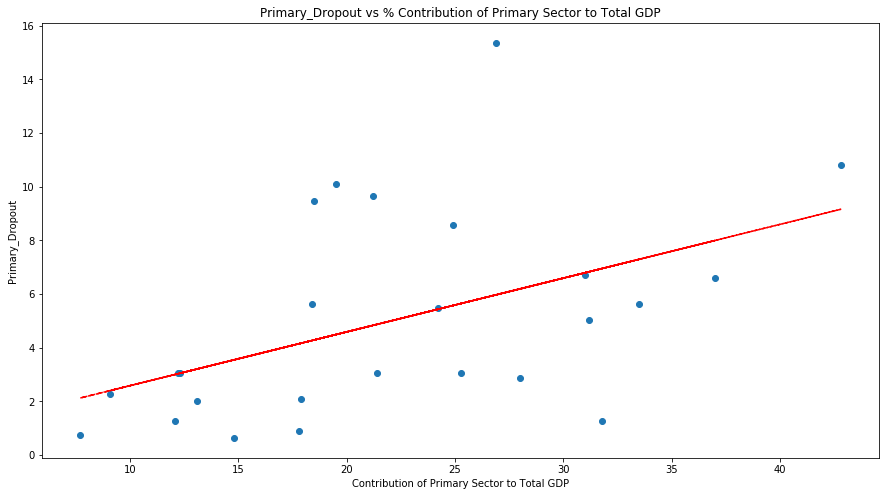

In [163]:
#plot primary dropout with contribution of primary sector to total gdp
plt.figure()
plt.scatter(x='primary_per',y='Primary_Dropout',data=master_df)
plt.xlabel('Contribution of Primary Sector to Total GDP')
plt.ylabel('Primary_Dropout')
plt.title('Primary_Dropout vs % Contribution of Primary Sector to Total GDP')
m,c=np.polyfit(master_df['primary_per'],master_df['Primary_Dropout'],1)#we are using this to get the best fit line
plt.plot(master_df['primary_per'], m*master_df['primary_per']+c, '--r')#plotting the best fit line


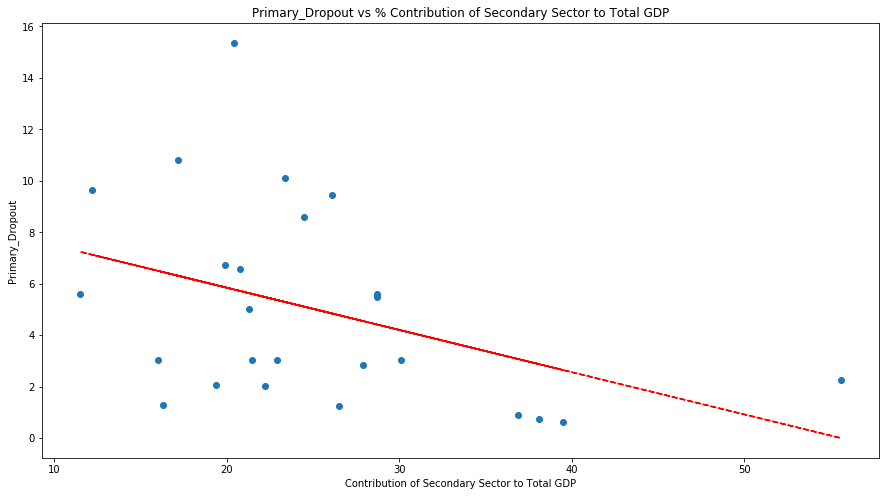

In [164]:
#plot primary dropout with contribution of secondary sector to total gdp
plt.figure()
plt.scatter(x='secondary_per',y='Primary_Dropout',data=master_df)
plt.xlabel('Contribution of Secondary Sector to Total GDP')
plt.ylabel('Primary_Dropout')
plt.title('Primary_Dropout vs % Contribution of Secondary Sector to Total GDP')
m,c=np.polyfit(master_df['secondary_per'],master_df['Primary_Dropout'],1)#we are using this to get the best fit line
plt.plot(master_df['secondary_per'], m*master_df['secondary_per']+c, '--r')#plotting the best fit line


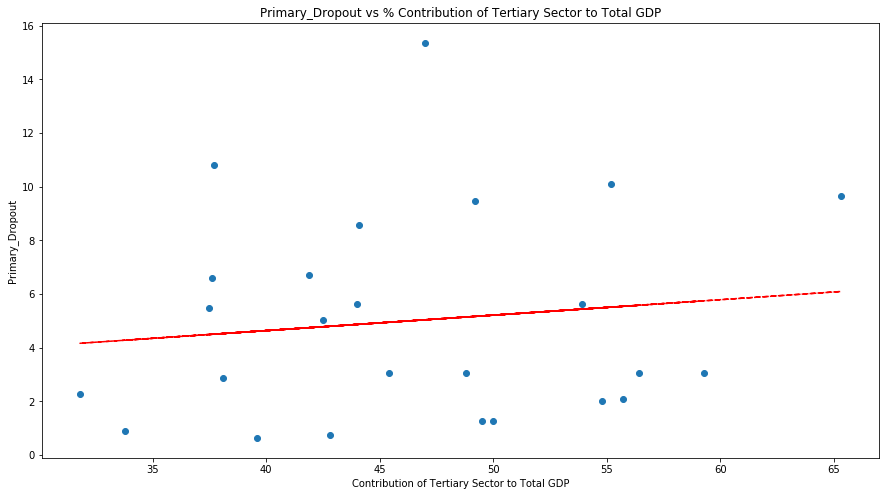

In [165]:
#plot primary dropout with contribution of tertiary sector to total gdp
plt.figure()
plt.scatter(x='tertiary_per',y='Primary_Dropout',data=master_df)
plt.xlabel('Contribution of Tertiary Sector to Total GDP')
plt.ylabel('Primary_Dropout')
plt.title('Primary_Dropout vs % Contribution of Tertiary Sector to Total GDP')
m,c=np.polyfit(master_df['tertiary_per'],master_df['Primary_Dropout'],1)#we are using this to get the best fit line
plt.plot(master_df['tertiary_per'], m*master_df['tertiary_per']+c, '--r')#plotting the best fit line


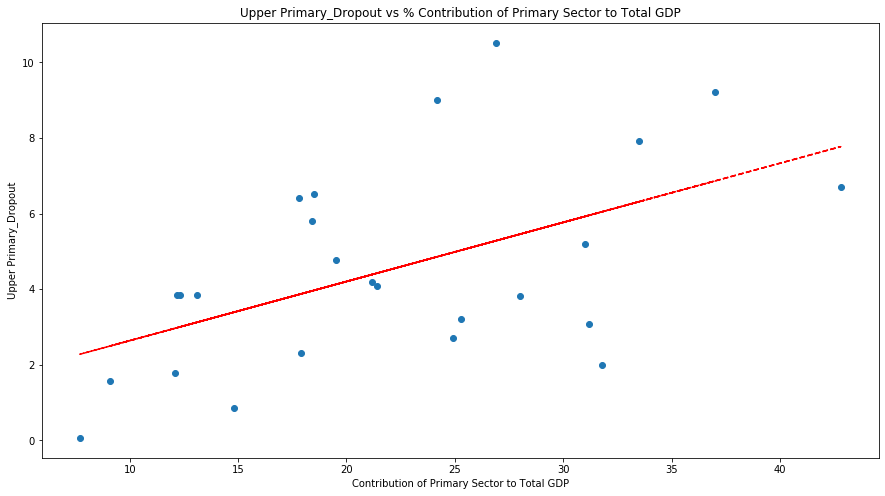

In [166]:
#plot upper_primary dropout with contribution of primary sector to total gdp
plt.figure()
plt.scatter(x='primary_per',y='Upper Primary_Dropout',data=master_df)
plt.xlabel('Contribution of Primary Sector to Total GDP')
plt.ylabel('Upper Primary_Dropout')
plt.title('Upper Primary_Dropout vs % Contribution of Primary Sector to Total GDP')
m,c=np.polyfit(master_df['primary_per'],master_df['Upper Primary_Dropout'],1)#we are using this to get the best fit line
plt.plot(master_df['primary_per'], m*master_df['primary_per']+c, '--r')#plotting the best fit line


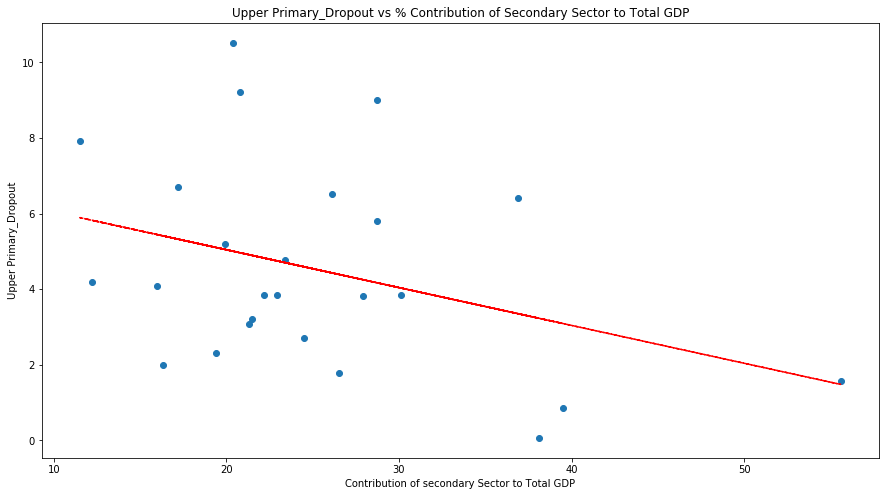

In [167]:
#plot upper_primary dropout with contribution of secondary sector to total gdp
plt.figure()
plt.scatter(x='secondary_per',y='Upper Primary_Dropout',data=master_df)
plt.xlabel('Contribution of secondary Sector to Total GDP')
plt.ylabel('Upper Primary_Dropout')
plt.title('Upper Primary_Dropout vs % Contribution of Secondary Sector to Total GDP')
m,c=np.polyfit(master_df['secondary_per'],master_df['Upper Primary_Dropout'],1)#we are using this to get the best fit line
plt.plot(master_df['secondary_per'], m*master_df['secondary_per']+c, '--r')#plotting the best fit line


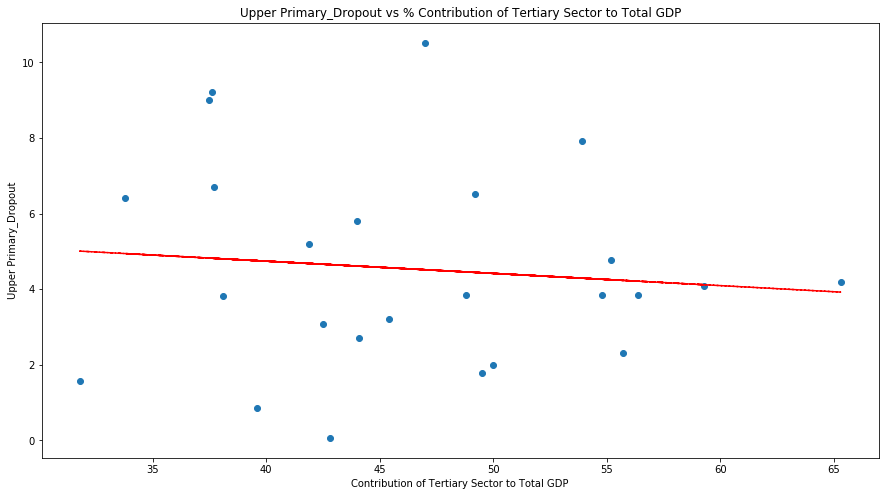

In [168]:
#plot upper_primary dropout with contribution of tertiary sector to total gdp
plt.figure()
plt.scatter(x='tertiary_per',y='Upper Primary_Dropout',data=master_df)
plt.xlabel('Contribution of Tertiary Sector to Total GDP')
plt.ylabel('Upper Primary_Dropout')
plt.title('Upper Primary_Dropout vs % Contribution of Tertiary Sector to Total GDP')
m,c=np.polyfit(master_df['tertiary_per'],master_df['Upper Primary_Dropout'],1)#we are using this to get the best fit line
plt.plot(master_df['tertiary_per'], m*master_df['tertiary_per']+c, '--r')#plotting the best fit line


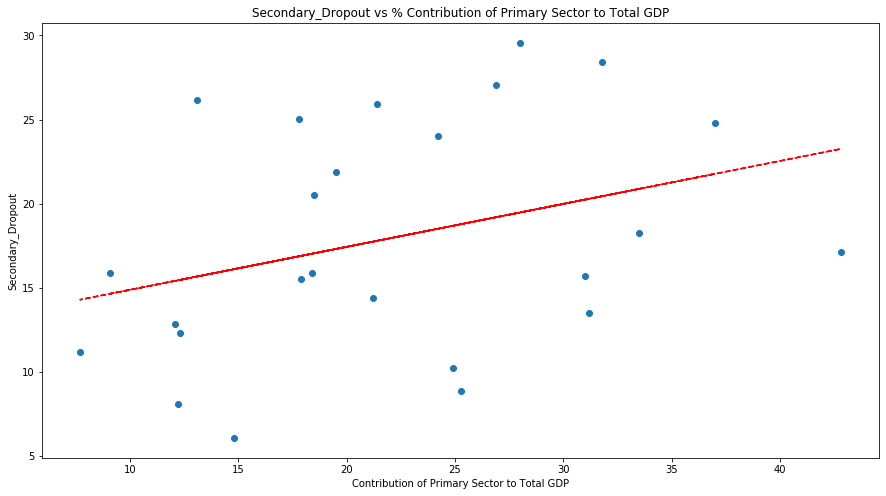

In [169]:
#plot secondary dropout with contribution of primary sector to total gdp
plt.figure()
plt.scatter(x='primary_per',y='Secondary_Dropout',data=master_df)
plt.xlabel('Contribution of Primary Sector to Total GDP')
plt.ylabel('Secondary_Dropout')
plt.title('Secondary_Dropout vs % Contribution of Primary Sector to Total GDP')
m,c=np.polyfit(master_df['primary_per'],master_df['Secondary_Dropout'],1)#we are using this to get the best fit line
plt.plot(master_df['primary_per'], m*master_df['primary_per']+c, '--r')#plotting the best fit line


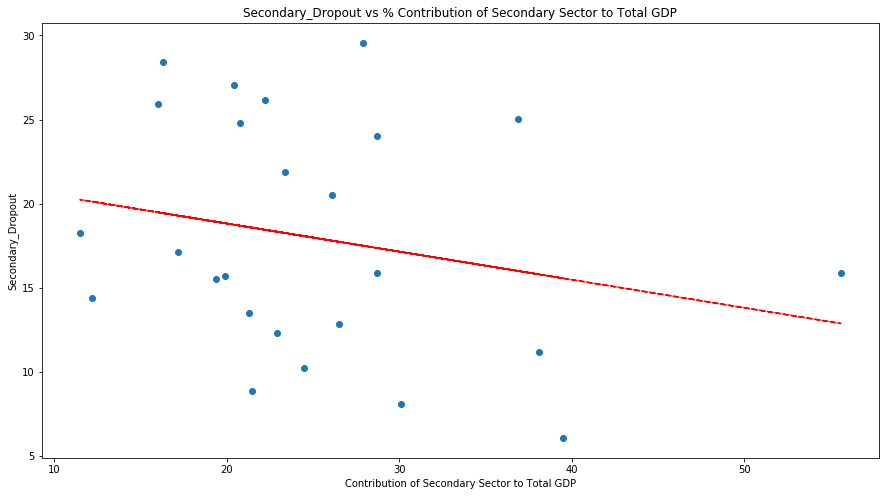

In [170]:
#plot secondary dropout with contribution of secondary sector to total gdp
plt.figure()
plt.scatter(x='secondary_per',y='Secondary_Dropout',data=master_df)
plt.xlabel('Contribution of Secondary Sector to Total GDP')
plt.ylabel('Secondary_Dropout')
plt.title('Secondary_Dropout vs % Contribution of Secondary Sector to Total GDP')
m,c=np.polyfit(master_df['secondary_per'],master_df['Secondary_Dropout'],1)#we are using this to get the best fit line
plt.plot(master_df['secondary_per'], m*master_df['secondary_per']+c, '--r')#plotting the best fit line


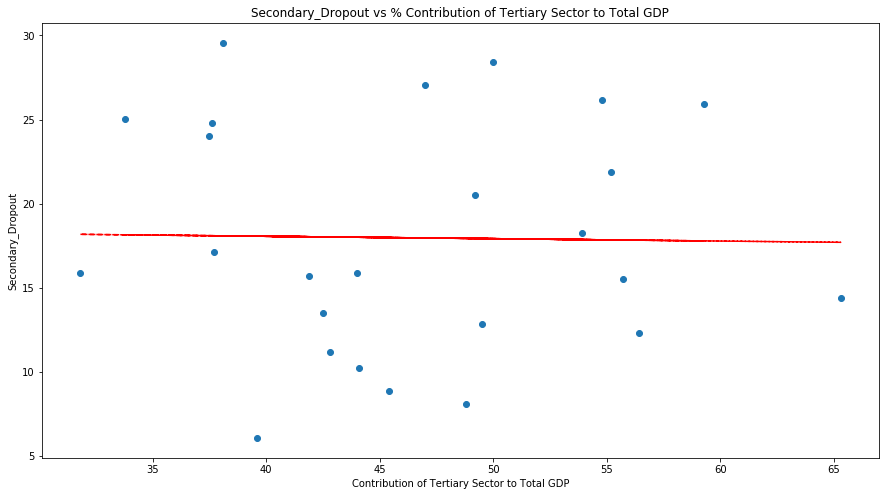

In [171]:
#plot secondary dropout with contribution of tertiary sector to total gdp
plt.figure()
plt.scatter(x='tertiary_per',y='Secondary_Dropout',data=master_df)
plt.xlabel('Contribution of Tertiary Sector to Total GDP')
plt.ylabel('Secondary_Dropout')
plt.title('Secondary_Dropout vs % Contribution of Tertiary Sector to Total GDP')
m,c=np.polyfit(master_df['tertiary_per'],master_df['Secondary_Dropout'],1)#we are using this to get the best fit line
plt.plot(master_df['tertiary_per'], m*master_df['tertiary_per']+c, '--r')#plotting the best fit line

### Ques: Is there any correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP?

### Ans : Yes the variable are correlated since we get a best fit line

# Total Population Ques

## You have the total population of each state from the data in part I. Is there any correlation between dropout rates and population? What is the expected trend and what is the observation?

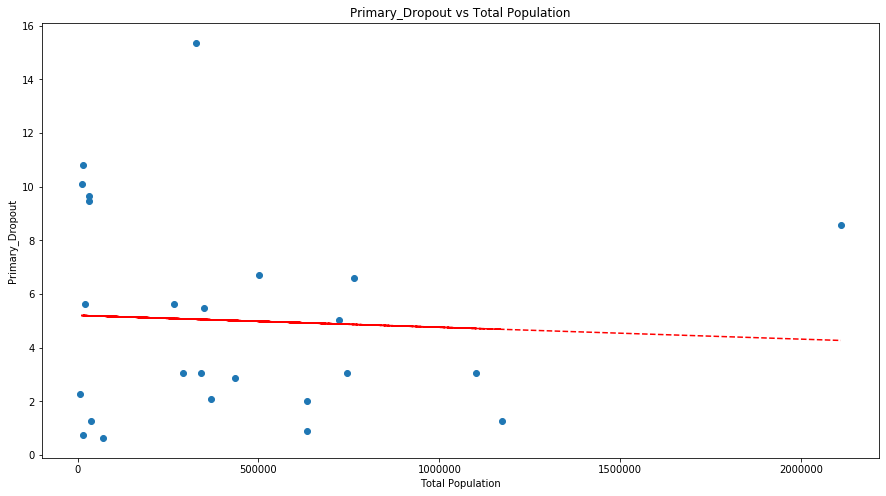

In [172]:
#plot primary dropout with contribution of total population to total gdp
plt.figure()
plt.scatter(x='Population',y='Primary_Dropout',data=master_df)
plt.xlabel('Total Population')
plt.ylabel('Primary_Dropout')
plt.title('Primary_Dropout vs Total Population')
m,c=np.polyfit(master_df['Population'],master_df['Primary_Dropout'],1)
plt.plot(master_df['Population'], m*master_df['Population']+c, '--r')#plotting the best fit line

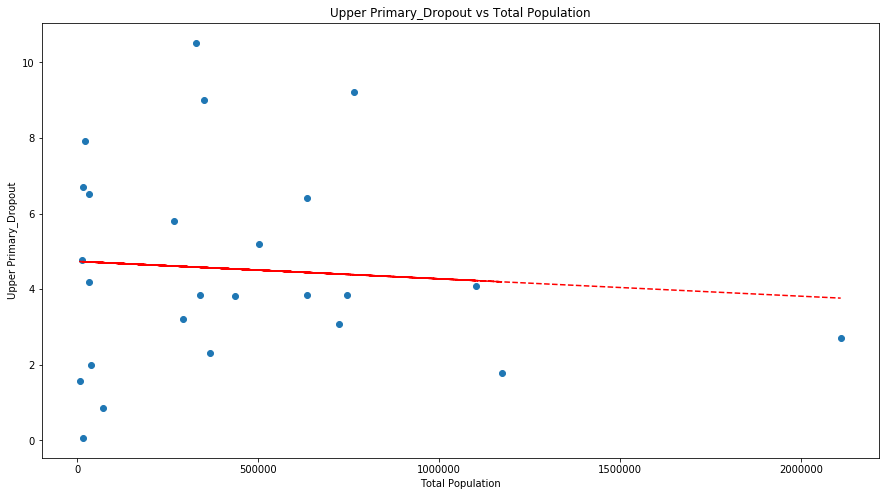

In [173]:
#plot upper_primary dropout with contribution of total population to total gdp
plt.figure()
plt.scatter(x='Population',y='Upper Primary_Dropout',data=master_df)
plt.xlabel('Total Population')
plt.ylabel('Upper Primary_Dropout')
plt.title('Upper Primary_Dropout vs Total Population')
m,c=np.polyfit(master_df['Population'],master_df['Upper Primary_Dropout'],1)
plt.plot(master_df['Population'], m*master_df['Population']+c, '--r')#plotting the best fit line

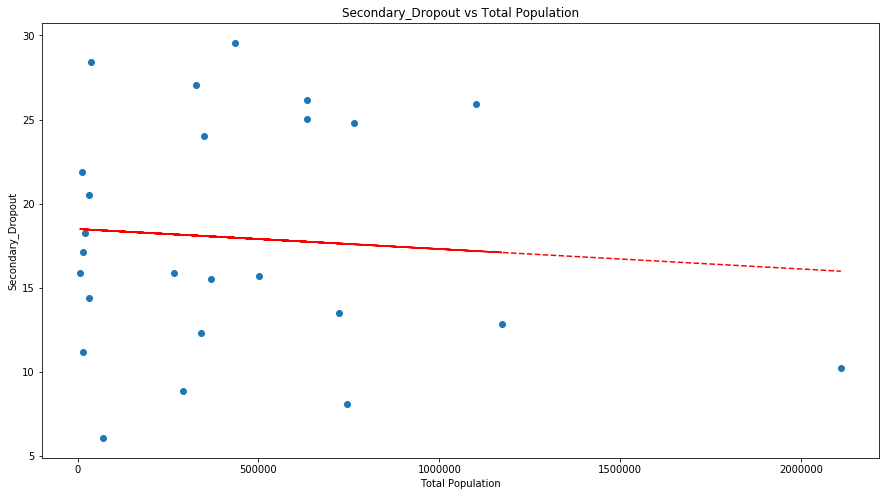

In [174]:
#plot secondary dropout with contribution of total population to total gdp
plt.figure()
plt.scatter(x='Population',y='Secondary_Dropout',data=master_df)
plt.xlabel('Total Population')
plt.ylabel('Secondary_Dropout')
plt.title('Secondary_Dropout vs Total Population')
m,c=np.polyfit(master_df['Population'],master_df['Secondary_Dropout'],1)
plt.plot(master_df['Population'], m*master_df['Population']+c, '--r')#plotting the best fit line

### Ans:The expected trend is with increase in population we see a downfall in the dropout rates

### Ques:Form at least one reasonable hypothesis for the observations from the data

### Ans: We observe that secondary dropout slope for all the sectors is decreasing showing that with increase in population dropout reduces.Moreover for primary sector the dropout slope Is positive showing if population increase dropout rate increase for all primary , upper primary and secondary
